# EECS 349 (Machine Learning) Homework 9

## How to submit your homework

1. Create a PDF document containing answers to the homework questions
2. Include source code for the program you write
2. If working with a partner, clearly state who you're working with **at the top of the PDF document**.
3. Compress all of the files specified into a .zip file
4. Name the file in the following manner, firstname_lastname_hw9.zip.
5. Submit this .zip file via Canvas by the date specified on Canvas

In this homework, you will work on your own **or in pairs** to complete a classification task on a dataset of handwritten digits. The dataset is included with this submission, and you can read more about it here: http://yann.lecun.com/exdb/mnist/ and you can read a paper that might help quite a bit here: http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf. You also have to install scikit-learn, a machine learning library for Python, to answer questions in this homework: http://scikit-learn.org/stable/index.html

## Reading the MNIST data
We have given a helper file "mnist.py" (thanks to http://g.sweyla.com/blog/2012/mnist-numpy/) that you can use to read in the data as follows:

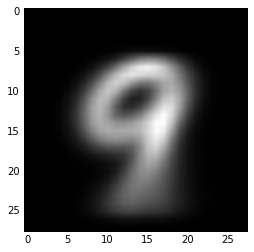

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mnist import load_mnist
%matplotlib inline

images, labels = load_mnist(digits=[9], path='.')
#Displaying the mean image for digit 9.
plt.imshow(images.mean(axis=0), cmap = 'gray')
plt.show()

That is what 9, when handwritten, looks like on average. Changing the digits argument to a list would give you all the images that match the labels in the list (e.g. digits = [0, 1, 2] would give you all the 0s, 1s, and 2s in MNIST). Setting path = '.' makes it look for the MNIST data in the current directory.

# *1) Exploring the data (2 points)*

To load the entire dataset, run the following:

In [2]:
images, labels = load_mnist(digits=range(0, 10), path='.')

Here each image[i] is a single handwritten image of the label[i]. For example, here's image[35], and it's label:

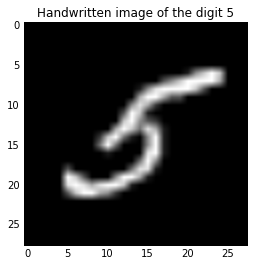

In [3]:
i = 35
plt.imshow(images[i], cmap = 'gray')
plt.title('Handwritten image of the digit ' + str(labels[i]))
plt.show()

It's a 5!

From this large dataset, you'll want to pick training and testing sets to build classifiers. To do this carefully, you'll need to study the dataset. Answer the following questions:

**A. (0.5 pt)** How many images are there in total? How many images are there of each digit?

**B. (0.5 pt)** Look at 50 examples of one of the digits. Show us some of the cases that you think might be challenging to be recognized by a classifeir. Why do you think they may be challenging?

**C. (0.5 pt)** You need to pick some subset of the data for training and testing. Pick a set of training and testing data. State how you selected your training and testing sets. Think about the goals of training and testing sets - we pick good training sets so our classifier generalizes to unseen data and we pick good testing sets to see whether our classifier generalizes. Justify your method for selecting the training and testing sets in terms of these goals.

**D. (0.5 pt)** Here's a quote from the paper about the construction of the dataset:

>The original black and white (bilevel) images were sized normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as result of the anti-aliasing (image interpolation) technique used by the normalization algorithm. Three versions of the database were used. In the first version, the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

What is the advantage of making the dataset consistent along these dimensions for the purposes of classification (scale, rotation, center-point, etc)? What does it tell you about what the classifier actually learned?


# *2) Algorithm Selection (1 points)*

Each classifier in scikit-learn has associated with it many hyperparameters (e.g. number of neighbors in KNN). The goal of this assignment is to understand the effect that these hyperparameters have on performance as well as how different classifiers compare to one another.

You'll build two classifiers on the MNIST data. You must use scikit-learn to build these classifiers (http://scikit-learn.org/stable/). A page of particular note is: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning.

Two different classifiers does not mean two different variants of a classifier. For example, two KNNs with two different K values are not different. Pick two different classification algorithms (e.g. SVM and Decision Tree).

Pick two classification algorithms you can use in the scikit-learn library. **For each classification algorithm**, do the following:

**A. (.5 pt)** At a high level (e.g. a paragraph or two), summarize how the algorithm works and how to use it for classification of images (e.g. how you would encode the data, how you would interpret the output of the classifier).

**B. (.5 pt)** For each hyperparameter of the algorithm (e.g. slack in an SVM, or K in a KNN), explain what it varies about the classification algorithm.

# *3) Classification (part 1) (3 points)*

Now that you've selected two classifiers, you will build, train and test each one. Pick one of the two classifiers chosen in problem 2 and do the following.

**A. (1 pt)** Build a classifier on your training and testing set. Complete the following starter code (see below) named **classification_1.py**. Read all comments in the code carefully.

You need to submit 4 files for this question: 
- classifier_1.py
- classifier_1.p (model file)
- training_set_1.p
- training_labels_1.p

**B. (1 pt)** Design, explain, and perform experiments to find the best hyperparameters for your classifier. Show the following graphs illustrating classification performance along two dimensions: 
1. Training set size vs performance on a testing set
2. Classifier parameters (e.g. number of neighbors in KNN) vs performance on a testing set
Describe and analyzise your result.
3. Show us a confusion matrix for the data.
Be sure to label your dimensions clearly on all graphs.

**C. (1 pt)** Visualizing misclassifications can sometimes help understand the behavior of a classifier. Report and show a set of images that were misclassified and how it affects your understanding of the behavior of the classifier, or the dataset. How does this relate to the images you thought might be challenging in the section "Exploring the dataset" above?

#### Starter code

In [ ]:
import pickle
import sklearn
from sklearn import svm # this is an example of using SVM

def preprocess(images):
    #this function is suggested to help build your classifier. 
    #You might want to do something with the images before 
    #handing them to the classifier. Right now it does nothing.
    return [i.flatten() for i in images]

def build_classifier(images, labels):
    #this will actually build the classifier. In general, it
    #will call something from sklearn to build it, and it must
    #return the output of sklearn. Right now it does nothing.
    classifier = svm.SVC()
    classifier.fit(images, labels)
    return classifier

##the functions below are required
def save_classifier(classifier, training_set, training_labels):
    #this saves the classifier to a file "classifier" that we will
    #load from. It also saves the data that the classifier was trained on.
    import pickle
    pickle.dump(classifier, open('classifier_1.p', 'w'))
    pickle.dump(training_set, open('training_set.p', 'w'))
    pickle.dump(training_labels, open('training_labels.p', 'w'))


def classify(images, classifier):
    #runs the classifier on a set of images. 
    return classifier.predict(images)

def error_measure(predicted, actual):
    return np.count_nonzero(abs(predicted - actual))/float(len(predicted))

if __name__ == "__main__":

    # Code for loading data
    
    # preprocessing
    images = preprocess(images)
    
    # pick training and testing set
    # YOU HAVE TO CHANGE THIS TO PICK DIFFERENT SET OF DATA
    training_set = images[0:1000]
    training_labels = labels[0:1000]
    testing_set = images[-100:]
    testing_labels = labels[-100:]

    #build_classifier is a function that takes in training data and outputs an sklearn classifier.
    classifier = build_classifier(training_set, training_labels)
    save_classifier(classifier, training_set, training_labels)
    classifier = pickle.load(open('classifier'))
    predicted = classify(testing_set, classifier)
    print error_measure(predicted, testing_labels)

# *4) Classification (part 2) (3 points)*

### Repeat the same tasks from question 3 with the other classifier you described in question 2.

For Part (A), you the code you hand in must be in files with the following names:
- classifier_2.py
- classifier_2.p (model file)
- training_set_2.p
- training_labels_2.p

# *5) Model comparison (1 points)*

Compare your two classifiers. Which classifier performed better? Back up that assertion by citing results from your experiment. Why do you think this classifier has better performance?  

### **Following questions are extra credit** 
# *6) Boosting (3 points)*

Boosting is a way to improve classification performance by combining classifiers. Perform the adaboosting algorithm on your training and testing set by using the AdaBoostClassifier function in sckit-learn.

Answer the following questions and submit a python script named **boosting.py** that includes two functions, boosting_A( ) and boosting_B( ). Each function takes a training and a testing set and their labels, and returns a confusion matrix. Since we deal with 10 classes (0 - 9), the confusion matrix should be a 10x10 array.

In [4]:
def boosting_A(training_set, training_labels, testing_set, testing_labels):
    # Build boosting algorithm for question A
    # Return confusion matrix
    return confusion_matrix

def boosting_B(training_set, training_labels, testing_set, testing_labels):
    # Build boosting algorithm for question B
    # Return confusion matrix
    
    return confusion_matrix

** A. (1 pt)** Try adaboosting with a weak classifer (default classifer of the AdaBoostClassifier function). Provide a confusion matrix. Does the boosting outperform classifers you built in the question 2?

** B. (1 pt)** Try adaboosting with an SVM classifier. Before performing boosting, you might need to find best hyperparameters for the SVM first. Provide a confusion matrix. Does the boosted classifier outperform the classifers you built in question 2?

** C. (1 pt)** Compare two boosted classifiers, one from **A** and the other from **B**. Which one is better? How did you compare their performances? Show us data.